In [1]:
import codigo
from codigo import utils
from codigo import model_LSTM
from codigo import model_utils

In [2]:
import pandas as pd
import numpy as np
pd.set_option('mode.chained_assignment',None)
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

In [3]:
import tensorflow as tf
from tensorflow import keras

# Importar Arrays de Entrenamiento, Validación y Prueba

In [4]:
with open('dataset/generado/dataset15min/array_Xtrain_down.npy', 'rb') as f:
    array_Xtrain = np.load(f)

In [5]:
len(array_Xtrain)

2582162

In [6]:
with open('dataset/generado/dataset15min/array_Ytrain_down.npy', 'rb') as f:
    array_Ytrain = np.load(f)

In [7]:
len(array_Ytrain)

2582162

In [8]:
with open('dataset/generado/dataset15min/array_Xval_down.npy', 'rb') as f:
    array_Xval = np.load(f)

In [9]:
len(array_Xval)

327302

In [10]:
with open('dataset/generado/dataset15min/array_Yval_down.npy', 'rb') as f:
    array_Yval = np.load(f)

In [11]:
len(array_Yval)

327302

In [12]:
with open('dataset/generado/dataset15min/array_Xtest.npy', 'rb') as f:
    array_Xtest = np.load(f)

In [13]:
len(array_Xtest)

436603

In [14]:
with open('dataset/generado/dataset15min/array_Ytest.npy', 'rb') as f:
    array_Ytest = np.load(f)

In [15]:
len(array_Ytest)

436603

# Entrenamiento Vanilla LSTM con dropout

In [16]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                4864      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 3

In [17]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/modeloGeneral_completo/vanilla_dropout.h5')

Epoch 1/50
80693/80693 [==============================] - 985s 12ms/step - loss: 9.2349e-04 - mae: 0.0205 - mse: 9.2349e-04 - val_loss: 0.0016 - val_mae: 0.0296 - val_mse: 0.0016
Epoch 2/50
80693/80693 [==============================] - 946s 12ms/step - loss: 7.3139e-04 - mae: 0.0182 - mse: 7.3139e-04 - val_loss: 0.0013 - val_mae: 0.0282 - val_mse: 0.0013
Epoch 3/50
80693/80693 [==============================] - 1043s 13ms/step - loss: 7.0638e-04 - mae: 0.0179 - mse: 7.0638e-04 - val_loss: 0.0016 - val_mae: 0.0307 - val_mse: 0.0016
Epoch 4/50
80693/80693 [==============================] - 1039s 13ms/step - loss: 7.0487e-04 - mae: 0.0179 - mse: 7.0487e-04 - val_loss: 0.0012 - val_mae: 0.0264 - val_mse: 0.0012
Epoch 5/50
80693/80693 [==============================] - 1036s 13ms/step - loss: 6.9677e-04 - mae: 0.0178 - mse: 6.9677e-04 - val_loss: 8.4709e-04 - val_mae: 0.0222 - val_mse: 8.4709e-04
Epoch 6/50
80693/80693 [==============================] - 1098s 14ms/step - loss: 7.0394e-04 -

13644/13644 [==============================] - 72s 5ms/step - loss: 8.3645e-04 - mae: 0.0215 - mse: 8.3645e-04
test loss, test acc: [0.0008364488021470606, 0.02153063751757145, 0.0008364488021470606]


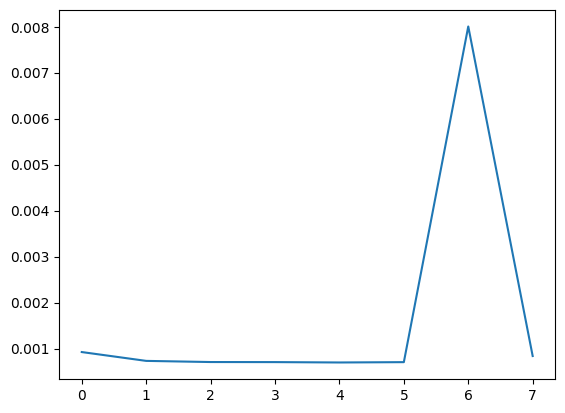

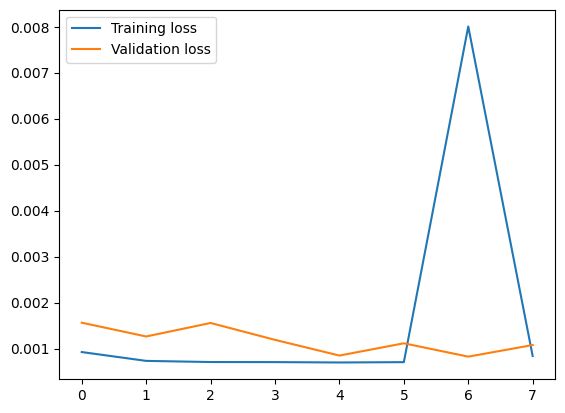

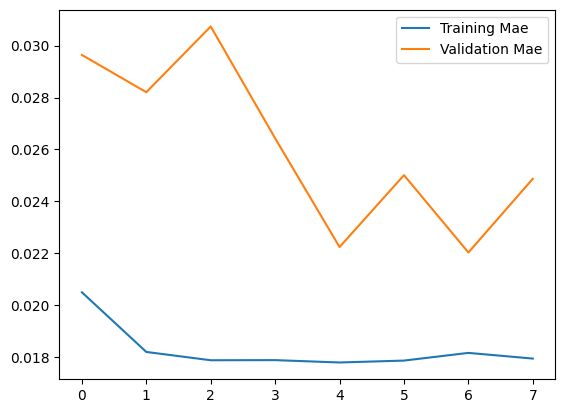

In [18]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

13644/13644 [==============================] - 68s 5ms/step


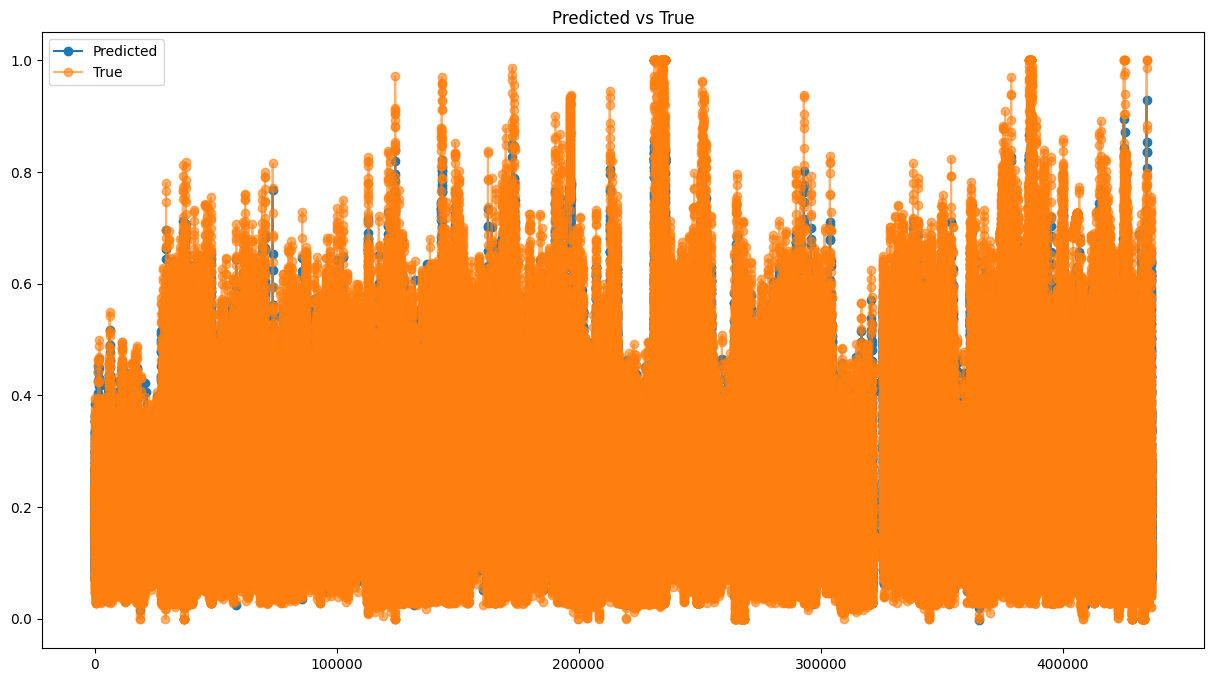

In [19]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [20]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.021530610097145204,
 'mse': 0.028921413329899913,
 'rmse': 0.0008364481489989124}

# Entrenamiento Vanilla LSTM sin dropout

In [21]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_nodrop(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 32)                4864      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 9,089
Trainable params: 9,089
Non-trainable params: 0
_________________________________________________________________


In [22]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/modeloGeneral_completo/vanilla_NO_dropout.h5')

Epoch 1/50
80693/80693 [==============================] - 1095s 14ms/step - loss: 2.5770e-04 - mae: 0.0093 - mse: 2.5770e-04 - val_loss: 3.2112e-04 - val_mae: 0.0128 - val_mse: 3.2112e-04
Epoch 2/50
80693/80693 [==============================] - 1085s 13ms/step - loss: 2.0679e-04 - mae: 0.0084 - mse: 2.0679e-04 - val_loss: 3.2313e-04 - val_mae: 0.0127 - val_mse: 3.2313e-04
Epoch 3/50
80693/80693 [==============================] - 1043s 13ms/step - loss: 2.0202e-04 - mae: 0.0083 - mse: 2.0202e-04 - val_loss: 2.7730e-04 - val_mae: 0.0113 - val_mse: 2.7730e-04
Epoch 4/50
80693/80693 [==============================] - 1062s 13ms/step - loss: 1.9913e-04 - mae: 0.0082 - mse: 1.9913e-04 - val_loss: 2.7341e-04 - val_mae: 0.0111 - val_mse: 2.7341e-04
Epoch 5/50
80693/80693 [==============================] - 1037s 13ms/step - loss: 1.9757e-04 - mae: 0.0081 - mse: 1.9757e-04 - val_loss: 2.7275e-04 - val_mae: 0.0110 - val_mse: 2.7275e-04
Epoch 6/50
80693/80693 [==============================] - 10

13644/13644 [==============================] - 68s 5ms/step - loss: 2.8623e-04 - mae: 0.0118 - mse: 2.8623e-04
test loss, test acc: [0.0002862307010218501, 0.011759407818317413, 0.0002862307010218501]


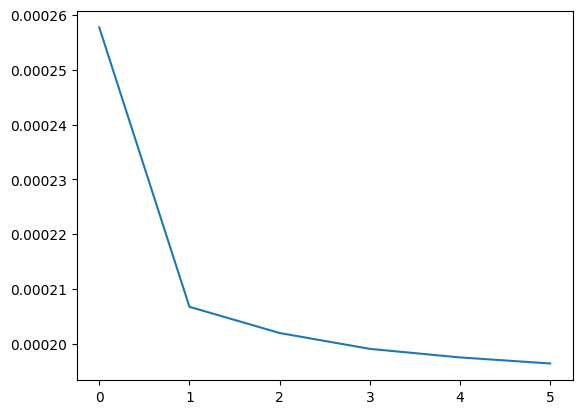

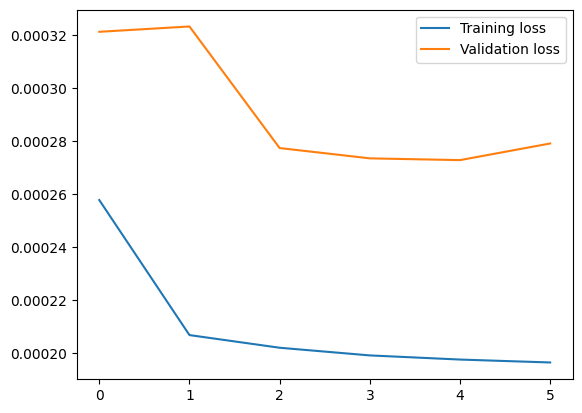

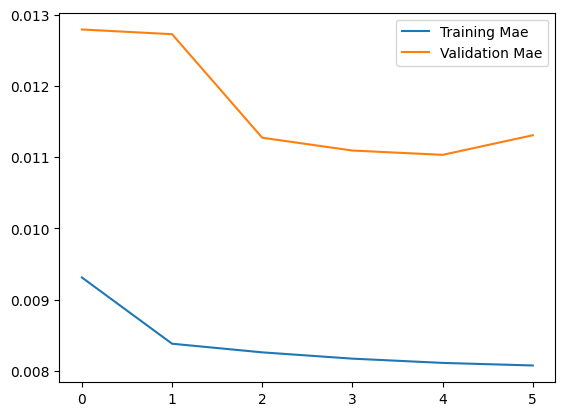

In [23]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

13644/13644 [==============================] - 67s 5ms/step


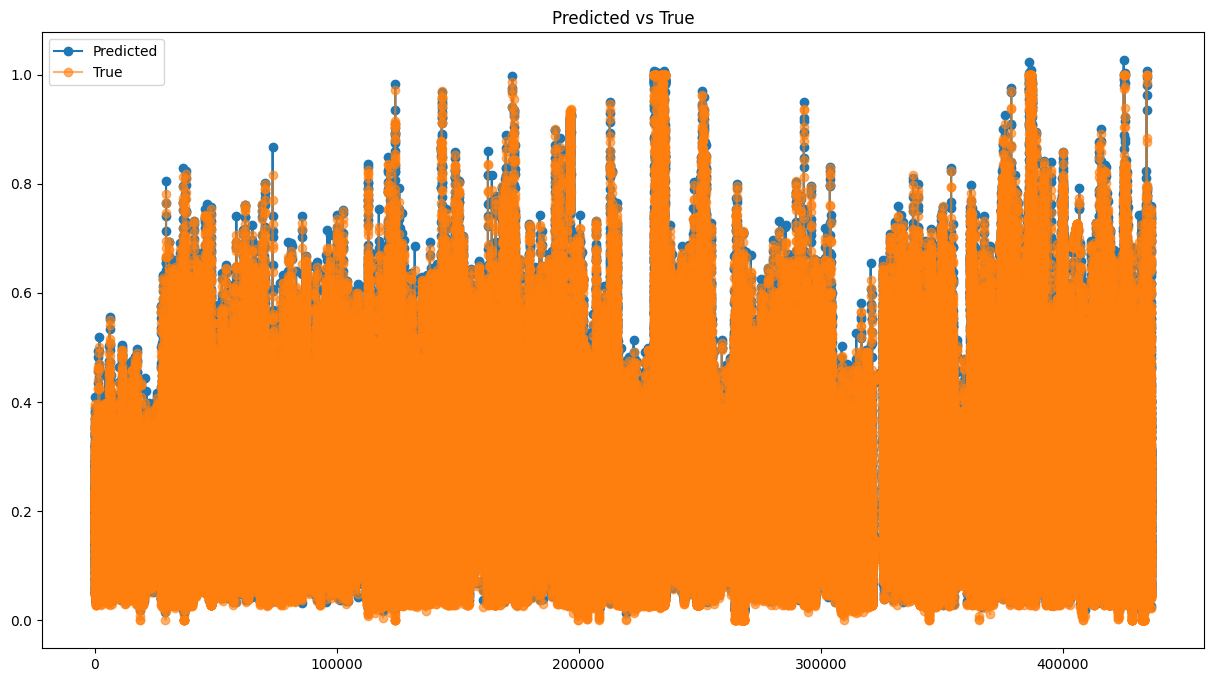

In [24]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [25]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.011759389290426005,
 'mse': 0.016918381087938857,
 'rmse': 0.0002862316186367272}

# Entrenamiento Stacked LSTM con dropout

In [26]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_Stacked(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 30, 32)            4864      
                                                                 
 lstm_3 (LSTM)               (None, 32)                8320      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 64)                2112      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)               

In [27]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/modeloGeneral_completo/stacked_dropout.h5')

Epoch 1/50
80693/80693 [==============================] - 2122s 26ms/step - loss: 8.9087e-04 - mae: 0.0198 - mse: 8.9087e-04 - val_loss: 0.0012 - val_mae: 0.0256 - val_mse: 0.0012
Epoch 2/50
80693/80693 [==============================] - 2053s 25ms/step - loss: 6.9797e-04 - mae: 0.0177 - mse: 6.9797e-04 - val_loss: 0.0011 - val_mae: 0.0244 - val_mse: 0.0011
Epoch 3/50
80693/80693 [==============================] - 2038s 25ms/step - loss: 6.6911e-04 - mae: 0.0174 - mse: 6.6911e-04 - val_loss: 0.0014 - val_mae: 0.0275 - val_mse: 0.0014
Epoch 4/50
80693/80693 [==============================] - 2111s 26ms/step - loss: 6.6301e-04 - mae: 0.0172 - mse: 6.6301e-04 - val_loss: 0.0017 - val_mae: 0.0301 - val_mse: 0.0017
Epoch 5/50
80693/80693 [==============================] - 2096s 26ms/step - loss: 6.5520e-04 - mae: 0.0172 - mse: 6.5520e-04 - val_loss: 0.0016 - val_mae: 0.0291 - val_mse: 0.0016


13644/13644 [==============================] - 112s 8ms/step - loss: 0.0015 - mae: 0.0290 - mse: 0.0015
test loss, test acc: [0.0014909144956618547, 0.02899683639407158, 0.0014909144956618547]


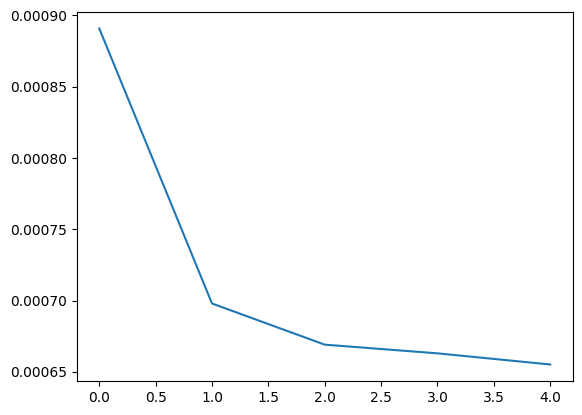

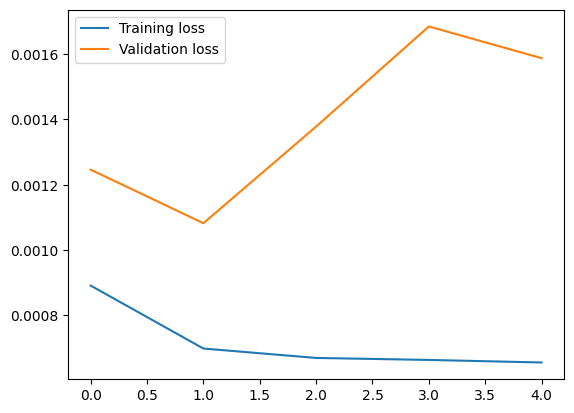

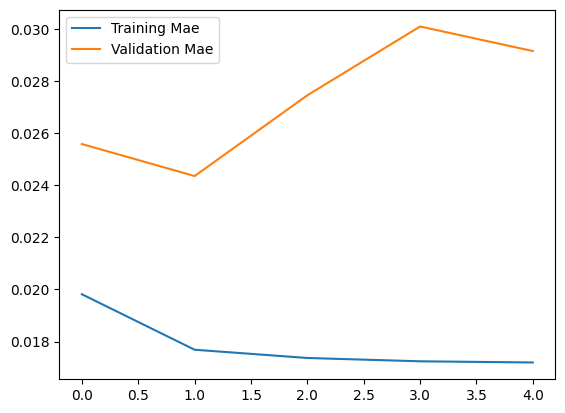

In [28]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

13644/13644 [==============================] - 108s 8ms/step


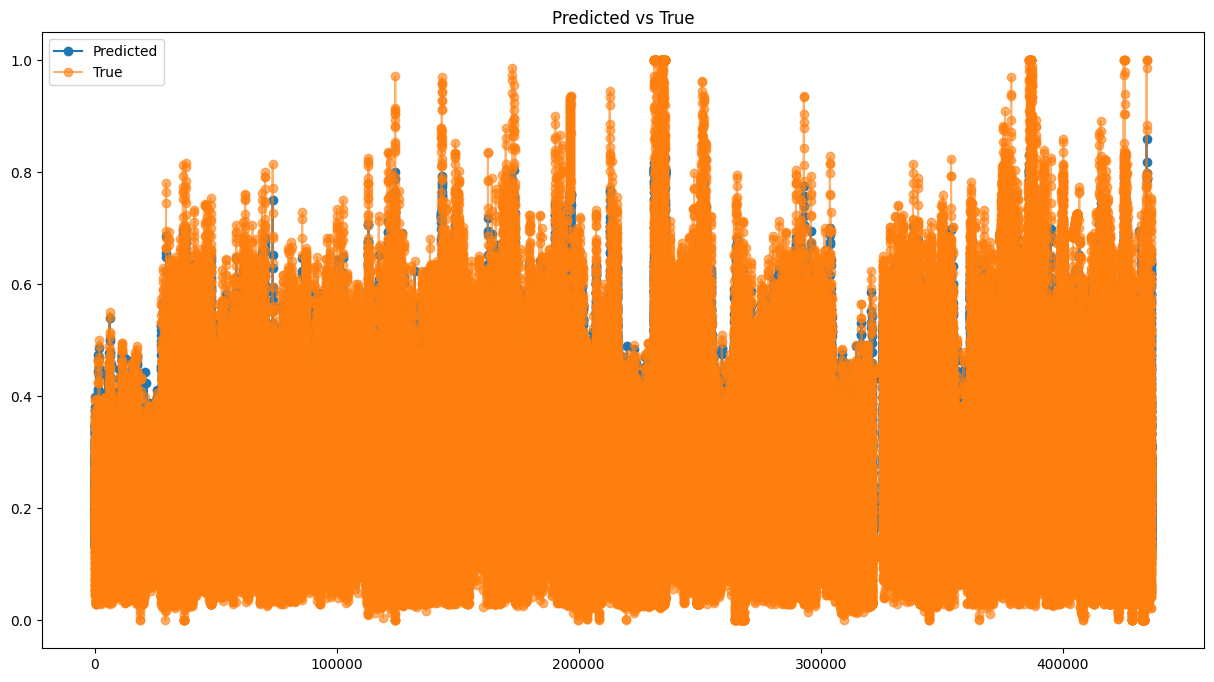

In [29]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [30]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.028996891175608358,
 'mse': 0.038612394058240754,
 'rmse': 0.001490916974908866}

# Entrenamiento Stacked LSTM sin dropout

In [31]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_Stacked_nodrop(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 30, 32)            4864      
                                                                 
 lstm_5 (LSTM)               (None, 32)                8320      
                                                                 
 dense_9 (Dense)             (None, 64)                2112      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 17,409
Trainable params: 17,409
Non-trainable params: 0
_________________________________________________________________


In [32]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/modeloGeneral_completo/stacked_NO_dropout.h5')

Epoch 1/50
80693/80693 [==============================] - 1767s 22ms/step - loss: 2.7840e-04 - mae: 0.0095 - mse: 2.7840e-04 - val_loss: 3.3020e-04 - val_mae: 0.0130 - val_mse: 3.3020e-04
Epoch 2/50
80693/80693 [==============================] - 1728s 21ms/step - loss: 2.0688e-04 - mae: 0.0084 - mse: 2.0688e-04 - val_loss: 3.5472e-04 - val_mae: 0.0135 - val_mse: 3.5472e-04
Epoch 3/50
80693/80693 [==============================] - 1746s 22ms/step - loss: 2.0535e-04 - mae: 0.0083 - mse: 2.0535e-04 - val_loss: 2.8678e-04 - val_mae: 0.0117 - val_mse: 2.8678e-04
Epoch 4/50
80693/80693 [==============================] - 1722s 21ms/step - loss: 2.0126e-04 - mae: 0.0083 - mse: 2.0126e-04 - val_loss: 2.7987e-04 - val_mae: 0.0112 - val_mse: 2.7987e-04
Epoch 5/50
80693/80693 [==============================] - 1732s 21ms/step - loss: 2.0689e-04 - mae: 0.0082 - mse: 2.0689e-04 - val_loss: 2.8600e-04 - val_mae: 0.0114 - val_mse: 2.8600e-04
Epoch 6/50
80693/80693 [==============================] - 17

13644/13644 [==============================] - 101s 7ms/step - loss: 2.8646e-04 - mae: 0.0117 - mse: 2.8646e-04
test loss, test acc: [0.0002864616981241852, 0.011659332551062107, 0.0002864616981241852]


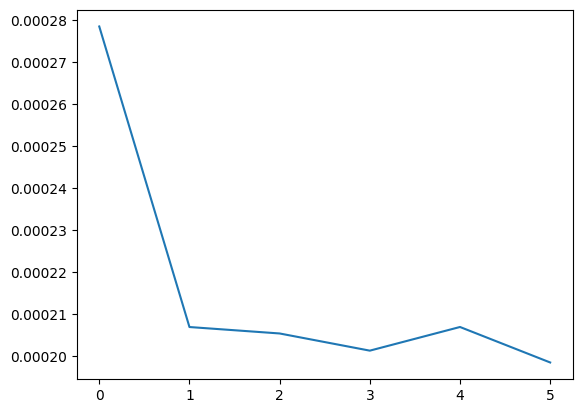

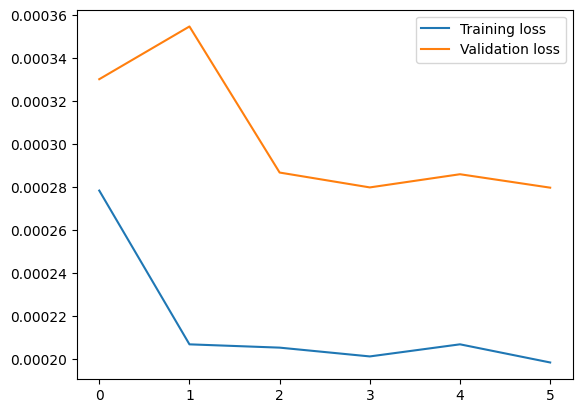

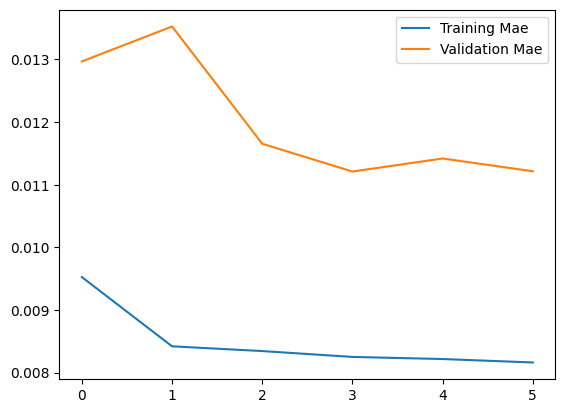

In [33]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

13644/13644 [==============================] - 107s 8ms/step


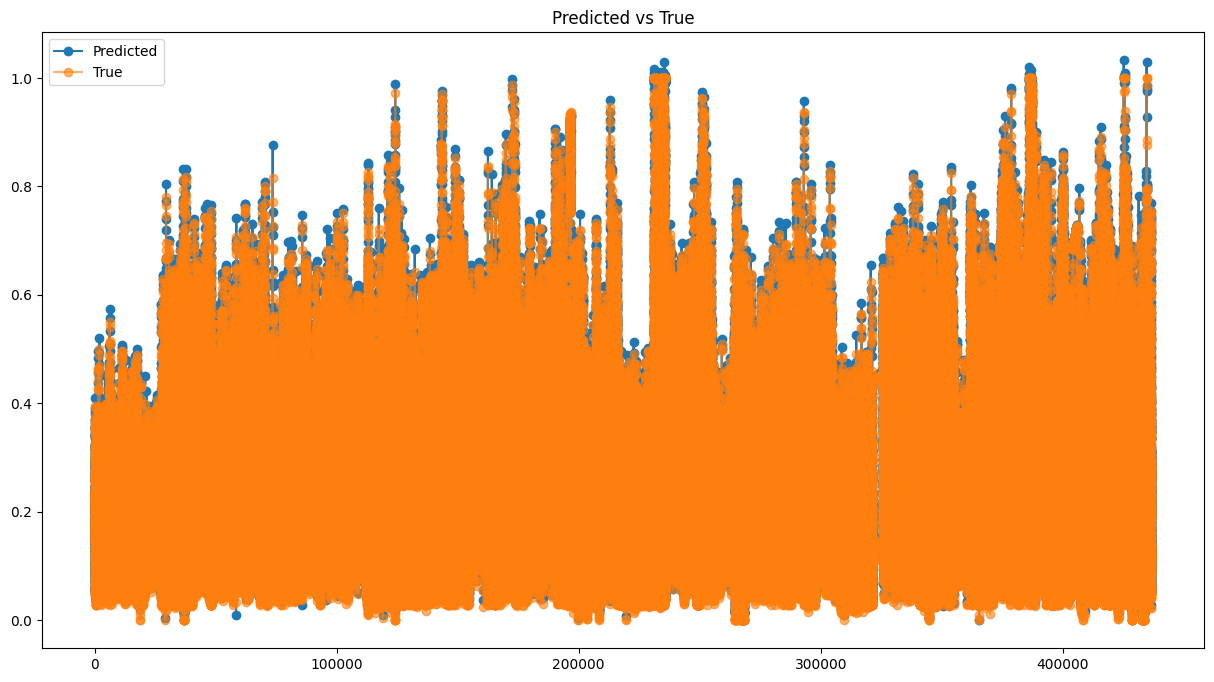

In [34]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [35]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.011659349669470841,
 'mse': 0.01692518127638255,
 'rmse': 0.0002864617612384105}

# Entrenamiento Bidirectional LSTM con dropout

In [36]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_Bidirectional(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 64)               9728      
 l)                                                              
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_12 (Dense)            (None, 64)                4160      
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dropout_8 (Dropout)         (None, 32)                0         
                                                      

In [37]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/modeloGeneral_completo/bidirectional_dropout.h5')

Epoch 1/50
80693/80693 [==============================] - 1242s 15ms/step - loss: 9.1303e-04 - mae: 0.0203 - mse: 9.1303e-04 - val_loss: 0.0011 - val_mae: 0.0259 - val_mse: 0.0011
Epoch 2/50
80693/80693 [==============================] - 1277s 16ms/step - loss: 7.2317e-04 - mae: 0.0181 - mse: 7.2317e-04 - val_loss: 0.0011 - val_mae: 0.0251 - val_mse: 0.0011
Epoch 3/50
80693/80693 [==============================] - 1555s 19ms/step - loss: 7.0313e-04 - mae: 0.0179 - mse: 7.0313e-04 - val_loss: 0.0015 - val_mae: 0.0294 - val_mse: 0.0015
Epoch 4/50
80693/80693 [==============================] - 1198s 15ms/step - loss: 6.9599e-04 - mae: 0.0178 - mse: 6.9599e-04 - val_loss: 0.0016 - val_mae: 0.0301 - val_mse: 0.0016


13644/13644 [==============================] - 72s 5ms/step - loss: 0.0014 - mae: 0.0285 - mse: 0.0014
test loss, test acc: [0.0014133615186437964, 0.028518494218587875, 0.0014133615186437964]


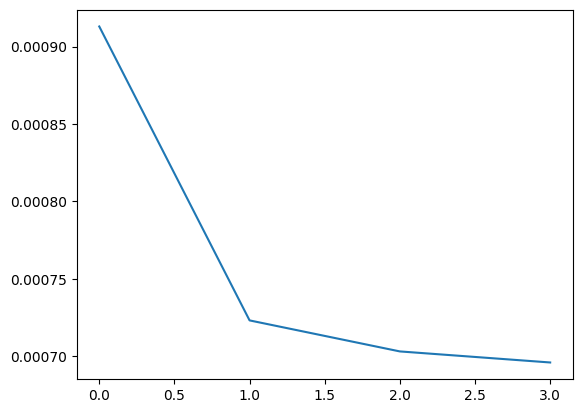

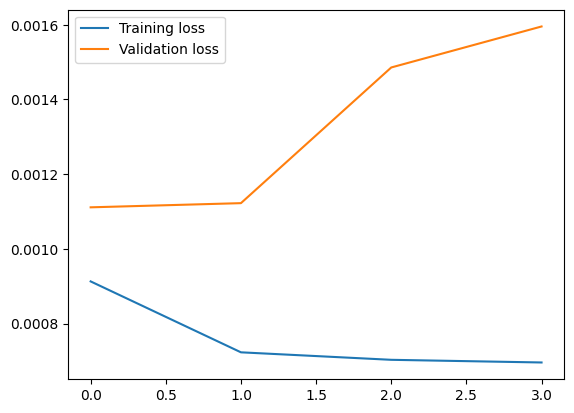

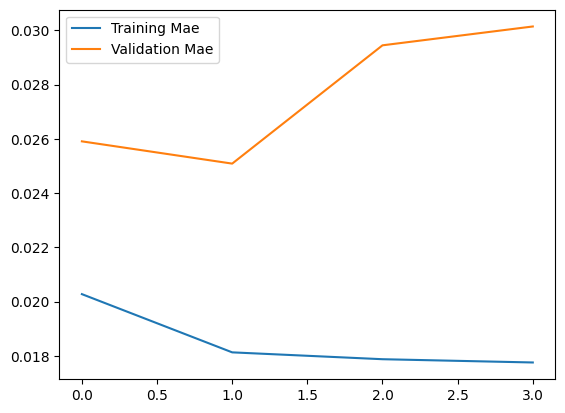

In [38]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

13644/13644 [==============================] - 68s 5ms/step


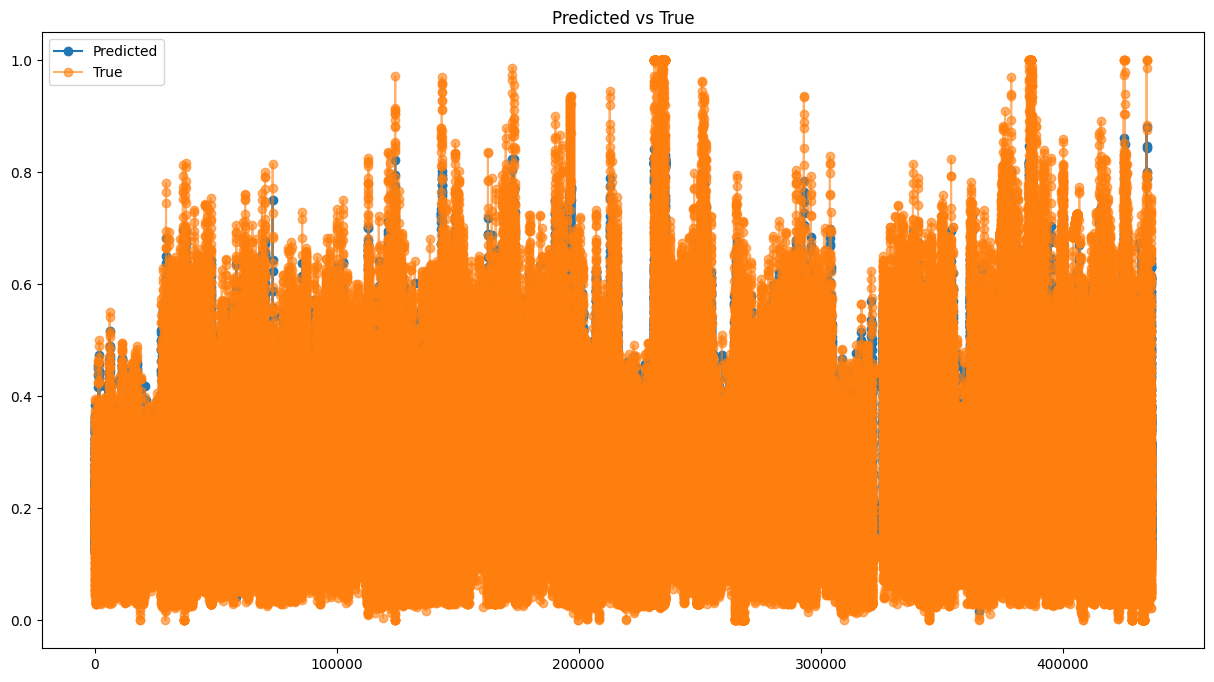

In [39]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [40]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.028518500323700808,
 'mse': 0.0375947161942616,
 'rmse': 0.0014133626857270756}

# Entrenamiento Bidirectional LSTM sin dropout

In [41]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_Bidirectional_nodrop(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_1 (Bidirectio  (None, 64)               9728      
 nal)                                                            
                                                                 
 dense_15 (Dense)            (None, 64)                4160      
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 1)                 33        
                                                                 
Total params: 16,001
Trainable params: 16,001
Non-trainable params: 0
_________________________________________________________________


In [42]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/modeloGeneral_completo/bidirectional_NO_dropout.h5')

Epoch 1/50
80693/80693 [==============================] - 1256s 16ms/step - loss: 2.6916e-04 - mae: 0.0095 - mse: 2.6916e-04 - val_loss: 3.7041e-04 - val_mae: 0.0141 - val_mse: 3.7041e-04
Epoch 2/50
80693/80693 [==============================] - 1525s 19ms/step - loss: 2.0594e-04 - mae: 0.0084 - mse: 2.0594e-04 - val_loss: 3.2372e-04 - val_mae: 0.0128 - val_mse: 3.2372e-04
Epoch 3/50
80693/80693 [==============================] - 1384s 17ms/step - loss: 2.0114e-04 - mae: 0.0083 - mse: 2.0114e-04 - val_loss: 2.7982e-04 - val_mae: 0.0115 - val_mse: 2.7982e-04
Epoch 4/50
80693/80693 [==============================] - 1275s 16ms/step - loss: 1.9847e-04 - mae: 0.0082 - mse: 1.9847e-04 - val_loss: 2.7492e-04 - val_mae: 0.0112 - val_mse: 2.7492e-04
Epoch 5/50
80693/80693 [==============================] - 1535s 19ms/step - loss: 1.9686e-04 - mae: 0.0081 - mse: 1.9686e-04 - val_loss: 2.7783e-04 - val_mae: 0.0112 - val_mse: 2.7783e-04
Epoch 6/50
80693/80693 [==============================] - 15

13644/13644 [==============================] - 72s 5ms/step - loss: 2.8645e-04 - mae: 0.0117 - mse: 2.8645e-04
test loss, test acc: [0.0002864546549972147, 0.011703128926455975, 0.0002864546549972147]


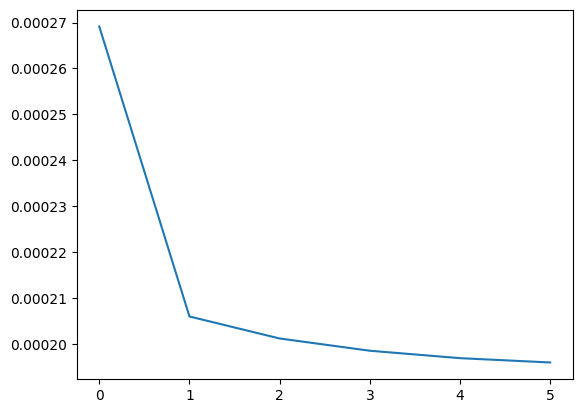

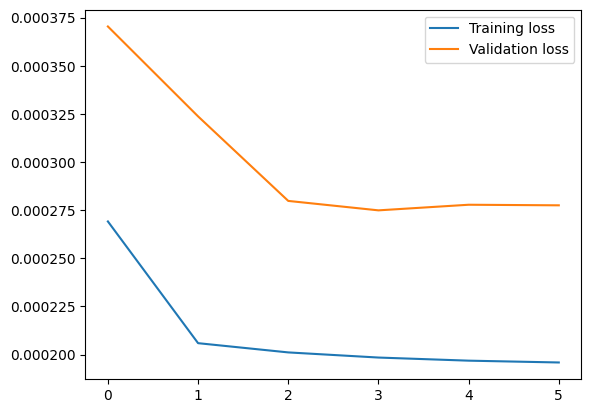

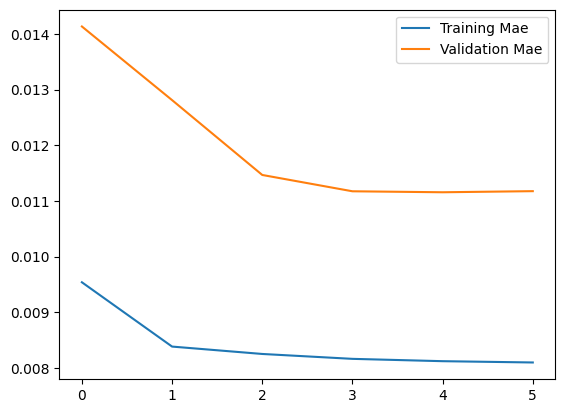

In [43]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

13644/13644 [==============================] - 67s 5ms/step


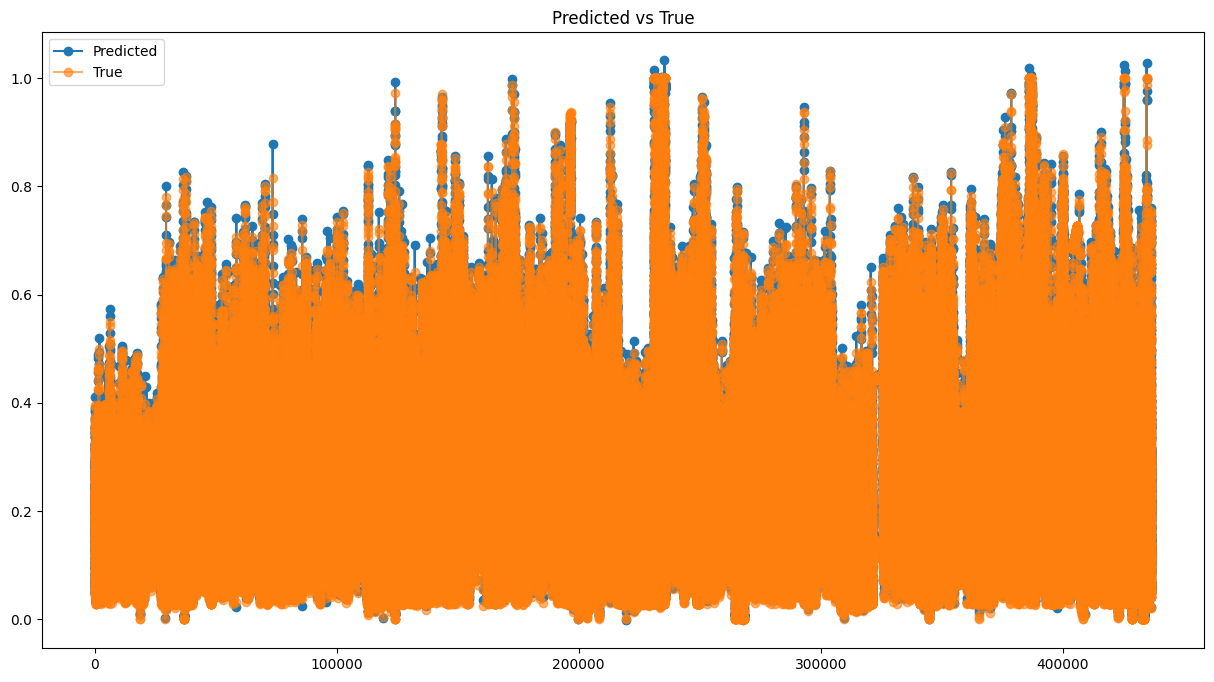

In [44]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [45]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.011703119613193617,
 'mse': 0.016924992152039613,
 'rmse': 0.0002864553593466025}